# Random Forest Classification

## Importing the libraries

In [17]:
pip install shap

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance
import shap
from plotnine.data import mpg
from plotnine import ggplot, aes, facet_grid, labs, geom_point, theme_dark

## Importing the dataset

In [19]:
dataset = pd.read_csv('File_name.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [21]:
print(X_train)

[[5.256147e+01 2.701204e+01 9.108550e+00 ... 1.087289e+01 4.450500e-01
  0.000000e+00]
 [4.579114e+01 1.977540e+00 4.916861e+01 ... 0.000000e+00 3.036930e+00
  2.499000e-02]
 [7.984260e+00 7.108400e-01 1.547424e+01 ... 0.000000e+00 7.581901e+01
  0.000000e+00]
 ...
 [2.210026e+01 6.176380e+00 6.896178e+01 ... 0.000000e+00 2.703160e+00
  5.841000e-02]
 [6.395543e+01 1.195588e+01 2.263885e+01 ... 1.195750e+00 2.530100e-01
  0.000000e+00]
 [4.226304e+01 5.310900e+00 4.777751e+01 ... 3.238760e+00 1.409780e+00
  0.000000e+00]]


In [22]:
print(y_train)

['Very High' 'Medium' 'Medium' ... 'Medium' 'Very High' 'Medium']


In [23]:
print(X_test)

[[ 6.98976    0.21855   86.13139   ...  0.         6.54276    0.       ]
 [47.3469388  0.4081633 13.3469388 ... 24.122449  14.6530612  0.       ]
 [73.57185    0.52473   12.57805   ...  0.36801    3.59071    0.       ]
 ...
 [70.85964    0.33087   26.19337   ...  0.         2.6093     0.       ]
 [38.21642    5.39944   55.60313   ...  0.         0.33893    0.44209  ]
 [70.2192     9.80053   19.57428   ...  0.         0.40599    0.       ]]


In [24]:
print(y_test)

['Medium' 'Medium' 'Medium' 'Very High' 'Low' 'Very High' 'Very High'
 'Medium' 'High' 'Medium' 'Low' 'Very High' 'Medium' 'Medium' 'Medium'
 'Medium' 'Very High' 'Low' 'Very High' 'Medium' 'Low' 'Very High'
 'Medium' 'Very High' 'Medium' 'Very High' 'High' 'Very High' 'Medium'
 'High' 'Very High' 'Medium' 'Medium' 'Medium' 'Very High' 'Medium'
 'Very High' 'Low' 'Very High' 'Low' 'Very High' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Very High' 'Medium' 'Medium'
 'Medium' 'Low' 'High' 'Medium' 'Very High' 'Very High' 'Medium' 'Medium'
 'Medium' 'Medium' 'Low' 'Very High' 'Very High' 'Medium' 'High'
 'Very High' 'Very High' 'Medium' 'Medium' 'Medium' 'Very High' 'Medium'
 'Very High' 'Low' 'Very High' 'Very High' 'Medium' 'Medium' 'Medium'
 'High' 'Very High' 'Very High' 'Very High' 'Very High' 'Very High'
 'Medium' 'Medium' 'Very High' 'Very High' 'Medium' 'Very High'
 'Very High' 'Very High' 'Medium' 'Medium' 'Medium' 'Medium' 'Very High'
 'Medium' 'Medium' 'High' 'Very 

## Training the Random Forest Classification model on the Training set

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting the Test set results

In [26]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Medium' 'Medium']
 ['Medium' 'Medium']
 ['Medium' 'Medium']
 ['Very High' 'Very High']
 ['Low' 'Low']
 ['Very High' 'Very High']
 ['Very High' 'Very High']
 ['Medium' 'Medium']
 ['Medium' 'High']
 ['Medium' 'Medium']
 ['Medium' 'Low']
 ['Very High' 'Very High']
 ['Medium' 'Medium']
 ['Medium' 'Medium']
 ['Very High' 'Medium']
 ['Very High' 'Medium']
 ['Very High' 'Very High']
 ['Medium' 'Low']
 ['Very High' 'Very High']
 ['Medium' 'Medium']
 ['Low' 'Low']
 ['Very High' 'Very High']
 ['Medium' 'Medium']
 ['Medium' 'Very High']
 ['Medium' 'Medium']
 ['Very High' 'Very High']
 ['Medium' 'High']
 ['Very High' 'Very High']
 ['Medium' 'Medium']
 ['Medium' 'High']
 ['Medium' 'Very High']
 ['Medium' 'Medium']
 ['Medium' 'Medium']
 ['Medium' 'Medium']
 ['Very High' 'Very High']
 ['Medium' 'Medium']
 ['Very High' 'Very High']
 ['Medium' 'Low']
 ['Very High' 'Very High']
 ['Low' 'Low']
 ['Very High' 'Very High']
 ['Medium' 'Medium']
 ['Medium' 'Medium']
 ['Medium' 'Medium']
 ['Medium' 'Medium'

## Making the Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  1   1  27   1]
 [  0  15  18   2]
 [  0   3 145  17]
 [  1   1  22 109]]


0.743801652892562

**Applying k-Fold Cross Validation**

In [28]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.77 %
Standard Deviation: 4.86 %


**Feature Importance Analysis**

In [29]:
classifier.feature_importances_

array([0.1393342 , 0.24073814, 0.20128796, 0.05483063, 0.07832254,
       0.21537214, 0.07011439])

Text(0.5, 0, 'Random Forest Feature Importance')

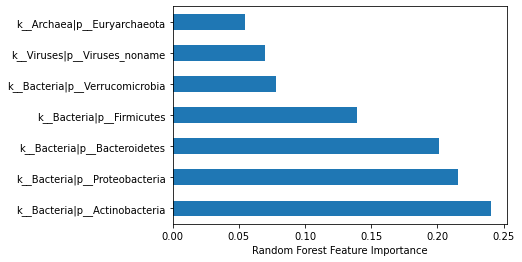

In [31]:
#Feature importance using Feature importance attribute in Random forest classifier
feat_importances = pd.Series(classifier.feature_importances_, index=dataset.columns[0:7])
feat_importances.nlargest(7).plot(kind='barh')
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

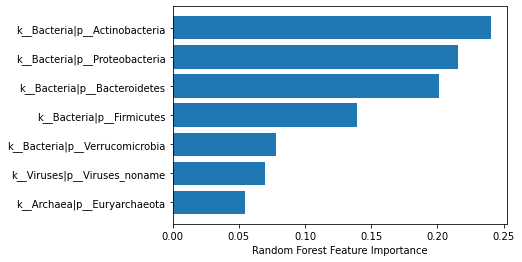

In [32]:
sorted_idx = classifier.feature_importances_.argsort()
plt.barh(dataset.columns[0:7][sorted_idx], classifier.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [33]:
permutation_importance(classifier, X_test, y_test)

{'importances': array([[0.0137741 , 0.01101928, 0.        , 0.00826446, 0.01652893],
        [0.13774105, 0.11294766, 0.14600551, 0.1322314 , 0.13774105],
        [0.0523416 , 0.04958678, 0.04683196, 0.01652893, 0.02479339],
        [0.0137741 , 0.        , 0.01101928, 0.01928375, 0.00826446],
        [0.01652893, 0.00550964, 0.03581267, 0.02479339, 0.00275482],
        [0.12121212, 0.09917355, 0.12121212, 0.09641873, 0.12121212],
        [0.00826446, 0.01652893, 0.0137741 , 0.01652893, 0.0137741 ]]),
 'importances_mean': array([0.00991736, 0.13333333, 0.03801653, 0.01046832, 0.01707989,
        0.11184573, 0.0137741 ]),
 'importances_std': array([0.00567252, 0.01110162, 0.01451453, 0.00637787, 0.01224579,
        0.01150447, 0.00301776])}

Text(0.5, 0, 'Random Forest permutation importance')

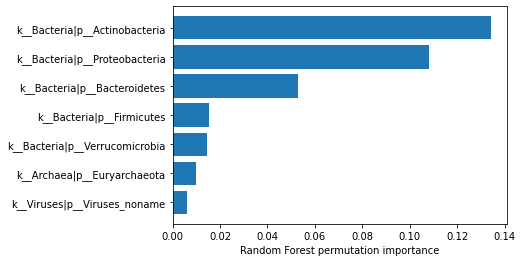

In [34]:
#Feature importance using Permutation Feature importance
perm_importance = permutation_importance(classifier, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(dataset.columns[0:7][sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest permutation importance")

Text(0.5, 0, 'Random Forest permutation importance')

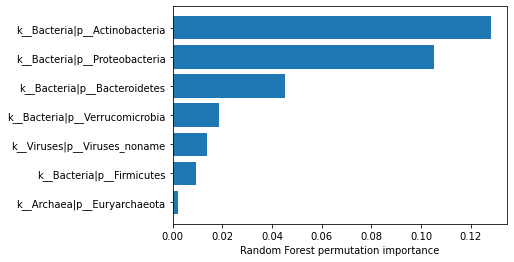

In [35]:
perm_importance = permutation_importance(classifier, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(dataset.columns[0:7][sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest permutation importance")

In [40]:
#Feature importance using SHAP values from SHAP library
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_test)

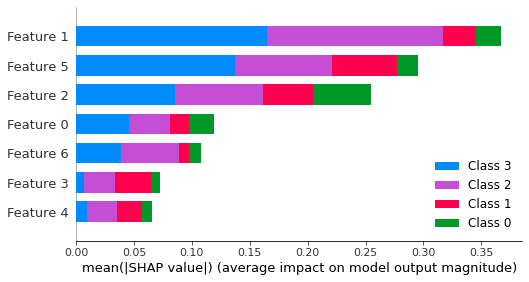

In [38]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

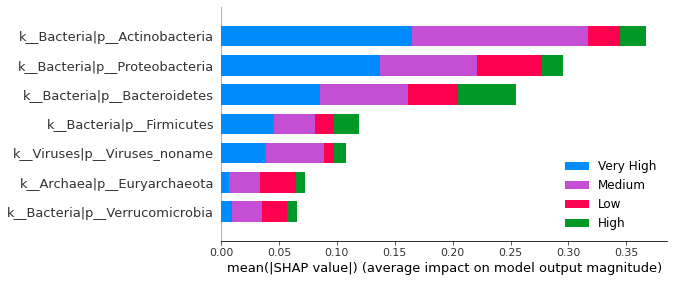

In [39]:
Class = ["Very High", "High", "Medium", "Low"]
Class2 = ["Low", "High", "Medium", "Very High"]
shap.summary_plot(shap_values, X_test, feature_names= dataset.columns,
                  class_names = classifier.classes_)
